# Working with temporal data

> “Ever since the dawn of civilization, people have not been content to see events as unconnected and inexplicable. They have craved an understanding of the underlying order in the world."
>
> Stephen Hawking (1988)

Time is one of the most fundamental ways humans organize things in life and what we use to understand of the underlying world, as Stephen Hawking famously put it in his book *A Brief History of Time* ({cite}`Hawking1988`). Hence, it is not surprising that the time dimension is very commonly attached to almost all data that we have in the world (the other dimension is naturally space or location, which we will focus in Part II). Hence, being able to handle and work with temporal information is extremely important when doing data analysis. Time information in the data allows us to see patterns through time (trends) as well as to make predictions into the future (at varying level of confidence). In this section, we will introduce some of the core ideas and functionalities how you can work with temporal data in Python and `pandas`.

## Date and time basics

Before doing any programming, we need to understand a few details about time conventions themselves. There are a couple of ways how time information (commonly referred as a `timestamp`) is typically represented. The first one is to represent the temporal information as text with specific format such as `"2020-12-24T09:12:45Z"`, which follows the international ISO 8601 standard [^isostandard]. In this format, the date components (year, month, day) are separated with dashes (`-`) and the time components (hour, minute, second) are separated with colons (`:`). Typically there is the letter `T` separating the date and time components from each other (though in some other formats there could just be a space between them). 

The letter `Z` at the end of the string relates to time zones and means that the time here is represented as Coordinated Universal Time (UTC). Time zone information around the world is expressed using negative or positive offsets from the UTC time standard. `UTC±00:00` is the same as Greenwich Mean Time (GMT) used for example in the United Kingdom (during winter months), and it was chosen after a series of conferences between 1881-1884 (Ogle, 2015) as the worldwide standard for representing the zone 0 to which all other time zones in the world are relative. For instance, local time in Finland is two hours ahead of UTC, meaning that the time zone information is expressed as `UTC+2` or `UTC+02:00`, whereas the local time in New York is four hours behind UTC (i.e., `UTC-4`). 

Another common way to represent time in addition to an ISO-standardized timestamp is to use "Unix time" (also known as "Epoch time" or "POSIX time"). Unix time is expressed as the number of seconds since the start of the "Unix Epoch", which began on the first of January 1970 at midnight in UTC (i.e., `1970-01-01T00:00:00Z`). This system was developed to describe a point in time in a simple numerical format and it is widely used in computers by different operating systems. One second is the increment in Unix time, such that the Unix time of December 22nd 2020 at 15:00:00 (UTC) would be represented as a single number `1608649200`. Using this kind of numerical representation of time makes it much easier for computers to store and manipulate the time information compared to having the information in a textual format (e.g., `2020-12-22T15:00:00Z`). 

Finally, an important convention that relates to time and time zones is the concept called Daylight Saving Time (DST), also known as summer time. DST is a commonly used practice for advancing clocks typically by an hour during warmer months so that darkness falls at a later clock time. This is also the reason why the time zone information in Finland during DST has an offset of +03:00 (summer time) instead of +02:00 which follows the official time zone specification for Finland, for example. DST became a common practice after the global energy crisis in the 1970s and was introduced in many countries during the following decade. However, some countries have never followed this convention and there is an ongoing discussion about whether to abandon this convention, for example in the EU.

## Working with temporal data in Python

Next we will learn how temporal data can be handled in Python in general. The most fundamental Python library for dealing with temporal data is called `datetime`, which supplies functionalities to construct and manipulate dates and times. The module is one of the Python's standard libraries, hence you do not need to install it separately. Other useful libraries for dealing with time and dates are `time` and `calendar`, which provide some additional functionalities to supplement those provided by `datetime`. Beyond this, the `pytz` library provides useful functionalities to deal with time zone information and `dateutil` provides some handy things to automate date parsing. Most often the `datetime` module and `pytz` (in addition to `pandas`) provide everything you need when doing analysis with temporal data. 

## Constructing datetime objects

A `datetime` object is a representation of time in a way that Python can understand and operate with it. With the `datetime` library it is possible to create a `datetime` object, for example by `parsing` it from text following the ISO 8601 format or from the Unix timestamp (notice that the name of the library and the object are both `datetime`). Let's see how we can create a `datetime` object from text using the  `.strptime()` function. The `.strptime()` function takes the variable `timestamp` as the first argument representing the time in a textual format and a second argument (`"%Y-%m-%dT%H:%M:%S"`) which looks quite complicated, but it is the `format code` that instructs `datetime` how the textual representation of time should be interpreted.

In [1]:
from datetime import datetime

timestamp = "2020-12-22T15:00:00"
datetime.strptime(timestamp, "%Y-%m-%dT%H:%M:%S")

datetime.datetime(2020, 12, 22, 15, 0)

As a result we get a `datetime` object in which the date has been converted into a set of numbers, where the first is the year, the second is the month, the third is the day, and so on. This structure is always the same, no matter which format the input data has been provided. By using format codes (i.e., the second argument of the function), we can tell the computer that the first component in our string represents year in 4 digits. For example, the `%Y` characters (i.e., a directive) are a special way to instruct the computer how to interpret the starting characters in the timestamp. In a similar manner, we can instruct the computer to read the month based on numbers with two digits (`12`) using the directive `%m`. As you can see, there is always a `%` character and then some letter after it, which is the way how we determine how the date is formatted in our text. Notice that the date components are separated with dashes (`-`) and the time components are separated with colons (`:`). As we can see from our format code, we can add those separator characters between the directives just as they are recorded in the timestamp. Following this approach it is possible to parse basically any kind of time information represented as text. A few of the most commonly used `datetime` format code directives are listed in Table 3.1.

: _**Table 3.1**. Most commonly used `datetime` directives and their meaning._

|Directive |Description                    |Examples               |
|:---------|:------------------------------|:----------------------|
|`%y`      |Year without century as a      |00, 20, etc.           |
|          |zero-padded number             |                       |
|`%Y`      |Year including century as a    |2000, 1920, etc.       |
|          |zero-padded number             |                       |
|`%m`      |Month as a zero-padded number  |01, ..., 12            |
|`%b`      |Month as abbreviated name      |Jan, ..., Dec          |
|`%B`      |Month as full name             |January, ..., December |
|`%d`      |Day of the month as a          |01, ..., 31            |
|          |zero-padded number             |                       |
|`%H`      |Hour (24-hour clock) as a      |00, ..., 23            |
|          |zero-padded number             |                       |
|`%I`      |Hour (12-hour clock) as a      |01, ..., 12            |
|          |zero-padded number             |                       |
|`%p`      |AM or PM (12-hour clock)       |am, pm, AM, PM         |
|`%M`      |Minute as a zero-padded number |00, ..., 59            |
|`%S`      |Second as a zero-padded number |00, ..., 59            |
|`%z`      |UTC offset (can be empty)      |+0000, +2000, etc.     |
|`%Z`      |Time zone name (can be empty)  |UTC, GMT               |
|`%a`      |Weekday as abbreviated name    |Mon, ..., Sun          |
|`%A`      |Weekday as full name           |Monday, ..., Sunday    |
|`%w`      |Weekday as a number where 0 is |0, ..., 6              |
|          |Sunday and 6 is Saturday       |                       |


To further solidify your understanding of how the timestamps can be parsed, let's look at a few more examples where we also include time zone information and parse the date information based on a format that we might typically use to record dates as humans (without the time component). Let's start by adding `+0200` to the end of the timestamp to express the UTC+2 time zone.

In [2]:
timestamp_with_tz = "2020-12-22T15:00:00 +0200"
dtz = datetime.strptime(timestamp_with_tz, "%Y-%m-%dT%H:%M:%S %z")
print(dtz)

2020-12-22 15:00:00+02:00


In [3]:
type(dtz)

datetime.datetime

In [4]:
dtz.tzinfo

datetime.timezone(datetime.timedelta(seconds=7200))

As we can see, now we produced a `datetime` object including the time zone information in the `tzinfo` attribute, which shows the offset (i.e., `timedelta`) from UTC in seconds. Having the timezone information attached can be very useful if doing analysis with temporal data that has been collected from different parts of the world (with different time zones). Let's look at another example in which we parse the `datetime` object from a textual representation that is written in a way that we might normally write dates.

In [5]:
written_date = "22 December 2020"
datetime.strptime(written_date, "%d %B %Y")

datetime.datetime(2020, 12, 22, 0, 0)

Here, we used a different format for instructing the computer how to read the text by using `%B` to denote a written month name. We also changed the order of the directives and used an empty space between them. Writing the exact form of how the timestamp information is written can be quite tedious work, especially if working with handwritten data where the structure of the time information can vary considerably. Luckily, Python provides a handy library called `dateutil` that automates most of this work. We can use a function called `.parse()` to automatically construct the `datetime` object from various formats.

In [6]:
from dateutil.parser import parse

timestamp_with_tz = "2020-12-22T15:00:00 +0200"
written_date = "22 December 2020"
dt1 = parse(timestamp_with_tz)
dt2 = parse(written_date)
print(f"{dt1}\n{dt2}")

2020-12-22 15:00:00+02:00
2020-12-22 00:00:00


The previous examples have all focused on using a textual representation of time as an input. Naturally it is also possible to construct a `datetime` object using the Unix time representation. Because Unix time is a simple number, it is much more straightforward to parse and use to create a `datetime` object. Here is an example of how we would convert the Unix time `1608649200` into a `datetime` object using the `.fromtimestamp()` function.

In [7]:
unix_time = 1608649200
datetime.fromtimestamp(unix_time)

datetime.datetime(2020, 12, 22, 17, 0)

Wait, what? In the beginning of this section, we said that the Unix time `1608649200` should be "December 22nd 2020 at 15:00:00 (UTC)", but here we see the result as five o'clock (i.e., `17, 0`). This is due to the fact that the computer that this code was written with was located in a Finnish time zone (UTC+02) and as Unix time is always passed as UTC, the computer automatically returns the timestamp in the local timezone (i.e., in Finnish time or whatever the local time has been specified in your computer's settings). This is a good thing to understand because it can be rather confusing when working with temporal data.

Finally, it is of course possible to initialize the `datetime` object directly by passing integer values into the object itself. Here we use the same date and time as before but add `30` seconds to the end.

In [8]:
dt = datetime(2020, 12, 22, 17, 0, 30)
dt

datetime.datetime(2020, 12, 22, 17, 0, 30)

## Parsing temporal components from datetime object

There are few useful tricks that you can use with the `datetime` objects. It is for example possible to parse specific temporal components directly from the `datetime` object. You can, for example, access the `.year`, `.month`, `.day`, `.hour`, `.minute` and `.second` attributes easily, which will return the value of the temporal element as an integer number.

In [9]:
dt = datetime(2020, 12, 22, 17, 0, 30)
print(dt.year)
print(dt.month)
print(dt.day)
print(dt.hour)

2020
12
22
17


In addition, you can parse the day of week, for example, using the `.weekday()` function or parse only the date components from the `datetime` object by using the `.date()` function.

In [10]:
print(dt.weekday())
print(dt.date())

1
2020-12-22


By using the `.strftime()` function, you can use the same directives from Table 2.1 to construct and convert the `datetime` object to any text representation of the date and time. Below you can see how this function can be used to create an easily understandable date and time text string based on our date and time information.

In [11]:
custom_format = "%d %B %Y is a %A. The time is %I:%M %p."
datetime.strftime(dt, custom_format)

'22 December 2020 is a Tuesday. The time is 05:00 PM.'

## Working with temporal data in pandas

After learning the basics of how temporal data can be represented as `datetime` objects, we can continue and see how temporal data can be manipulated in `pandas`. `pandas` is extremely powerful and flexible when it comes to working with temporal data. For instance, all of the simple tricks that we saw earlier with `datetime` can also be done using `pandas`. When doing data analysis with `pandas`, instead of dealing with single time observations, you often work with time series data such as daily temperature values that we analyzed in the previous section. `pandas` supports many useful functionalities related to parsing, manipulating, and aggregating time series data. Let's start exploring the temporal capabilities of `pandas` by reading daily temperature observations from one of the data files we used in the previous section and following the earlier approach. As a reminder, this the format of the file data:

```
STATION           ELEVATION  LATITUDE   LONGITUDE  DATE     PRCP     SNWD...
----------------- ---------- ---------- ---------- -------- -------- ----...
GHCND:FI000007501        179    67.3678    26.6328 19080101 0.00     -999...
GHCND:FI000007501        179    67.3678    26.6328 19080102 0.00     -999...
GHCND:FI000007501        179    67.3678    26.6328 19080103 0.12     -999...
```

You may notice a few things here: First, there are some additional data columns that were not present in the `helsinki-kumpula.txt` file we had worked with most in the previous section. We will ignore these here, but it worth noting their presence. We can specify with the parameter `usecols` that we only want to keep four columns from the file (station number, date information, and temperature). Second, there are timestamps stored in the `DATE` column. These can be automatically converted to `datetime` objects when reading the data by using the `parse_dates` parameter and providing a list of column names that should be parsed by `datetime`.

In [12]:
import pandas as pd

# Read the data and parse dates
fp = "data/finnish-stations/sodankyla-aws.txt"
data = pd.read_csv(
    fp,
    sep=r"\s+",
    skiprows=[1],
    na_values=["-9999"],
    usecols=["STATION", "DATE", "TMAX", "TMIN"],
    parse_dates=["DATE"],
)

# Rename the columns
new_names = {
    "STATION": "STATION_ID",
    "TMAX": "TMAX_F",
    "TMIN": "TMIN_F",
}
data = data.rename(columns=new_names)
data.head()

,STATION_ID,DATE,TMAX_F,TMIN_F
0,GHCND:FI000007501,1908-01-01,2.0,-37.0
1,GHCND:FI000007501,1908-01-02,6.0,-26.0
2,GHCND:FI000007501,1908-01-03,7.0,-27.0
3,GHCND:FI000007501,1908-01-04,-3.0,-27.0
4,GHCND:FI000007501,1908-01-05,4.0,-36.0


As we can see, the values in `DATE` column were automatically parsed into a format that is easier to read than the original one. When using `pandas` `datetime` parsing, the timestamps can be represented in different formats such as text in the ISO 8601 format or Unix times. Let's take a look at the values in our `DATE` column.

In [13]:
data["DATE"].head()

0   1908-01-01
1   1908-01-02
2   1908-01-03
3   1908-01-04
4   1908-01-05
Name: DATE, dtype: datetime64[ns]

As we can see, `pandas` converted the timestamp values into a time series having a specific data type called `datetime64`. The individual value of the time series is a specific `pandas` object called a `Timestamp` that is similar to Python's regular `datetime` object that we saw previously.

In [14]:
data.loc[0, "DATE"]

Timestamp('1908-01-01 00:00:00')

The `TimeStamp` object contains all the same attributes as the `datetime` object, but in addition it has many useful attributes and functions that can be used in a vectorized manner. For instance, you can parse different temporal components from the time series stored in a column very efficiently. Let's parse the temporal components from `DATE` into columns `YEAR`, `MONTH`, `DAY` and `HOUR`.

In [15]:
data["YEAR"] = data["DATE"].dt.year
data["MONTH"] = data["DATE"].dt.month
data["DAY"] = data["DATE"].dt.day
data["HOUR"] = data["DATE"].dt.hour
data.head()

,STATION_ID,DATE,TMAX_F,TMIN_F,YEAR,MONTH,DAY,HOUR
0,GHCND:FI000007501,1908-01-01,2.0,-37.0,1908,1,1,0
1,GHCND:FI000007501,1908-01-02,6.0,-26.0,1908,1,2,0
2,GHCND:FI000007501,1908-01-03,7.0,-27.0,1908,1,3,0
3,GHCND:FI000007501,1908-01-04,-3.0,-27.0,1908,1,4,0
4,GHCND:FI000007501,1908-01-05,4.0,-36.0,1908,1,5,0


Now the new columns have corresponding integer values for each temporal component. We were able to access all the temporal attributes by using the `.dt` accessor that is available for all `Series` having the `datetime64` data type. This is perhaps also a good time to note that when reading in dates that lack time data (hours, minutes, and seconds), the missing times will be filled in as midnight on the associated date. For example, the `Timestamp` we saw above for January 1st, 1908 had assigned a time as follows: `Timestamp('1908-01-01 00:00:00')`.

We can also combine the `datetime` functionalities with other methods from `pandas`. For example, we can check that we have observations from 117 years in total.

In [16]:
data["DATE"].dt.year.nunique()

117

### Handling time zones in pandas

When reading time series data with `pandas` as we did previously, the `Timestamp` objects are represented without time zone information. However, it is straightforward to attach time zone information to a `Series` with `Timestamp` objects using a method called `.tz_localize()`. When manipulating the data based on time information in `pandas`, the first step  is to specify a *{term}`DatetimeIndex`* for your `DataFrame` (here based on the `DATE` column) with the `.set_index()` method. Next, we can set the index and specify an appropriate time zone for our data (Europe/Helsinki). We can also specify the `nonexistent` parameter as "shift_forward", due to the fact that when the clocks are adjusted when changing from winter time to summer time there is literally one hour during the night that does not exist. With this parameter we tell `pandas` that this is OK, and we just want to shift the time forward (by an hour in most cases) in case there are such "non-existing" time observations. With the `ambiguous` parameter, we tell `pandas` that when adjusting the clocks backwards (moving from summer time to winter time), the observations having ambiguous times (e.g., duplicate timestamps due to DST) are set to `NaT` (Not-a-Time). Notice that it is up to you to decide the appropriate way for handling such cases (there are also other options for the `ambiguous` parameter such as "infer").

In [17]:
data = data.set_index("DATE")
data = data.tz_localize("Europe/Helsinki", nonexistent="shift_forward", ambiguous="NaT")
data.tail()

,STATION_ID,TMAX_F,TMIN_F,YEAR,MONTH,DAY,HOUR
DATE,,,,,,,
2024-10-22 00:00:00+03:00,GHCND:FI000007501,48.0,NaN,2024,10,22,0
2024-10-23 00:00:00+03:00,GHCND:FI000007501,40.0,30.0,2024,10,23,0
2024-10-24 00:00:00+03:00,GHCND:FI000007501,40.0,27.0,2024,10,24,0
2024-10-25 00:00:00+03:00,GHCND:FI000007501,46.0,29.0,2024,10,25,0
2024-10-26 00:00:00+03:00,GHCND:FI000007501,44.0,28.0,2024,10,26,0


Now the `DATE` column has been set as our index and it was moved to the left and replaced the original sequential numbers. Notice that the `DATE` column is no longer part of the columns in our `DataFrame` (we will later see how to restore it as a regular column). Also, the time zone information has been attached to the `Timestamp` objects as can be seen by the five last characters showing `+03:00`. From this information we can see that the time zone in Finland is +3 hours for the given dates (i.e., summer time). We can easily access the index values by calling it. Let's check the first and last values of `data.index` and its data type.

In [18]:
data.index[0]

Timestamp('1908-01-01 00:00:00+0140', tz='Europe/Helsinki')

In [19]:
data.index[-1]

Timestamp('2024-10-26 00:00:00+0300', tz='Europe/Helsinki')

In [20]:
type(data.index)

pandas.core.indexes.datetimes.DatetimeIndex

As we can see, the index is now a `DatetimeIndex`, which is essentially an array of `Timestamp` objects armed with all the attributes and methods that we have seen in the previous examples. In addition, our index has the time zone specified as "Europe/Helsinki". Tip: If you want to know which time zones are available, you can access them using `from pytz import all_timezones`, which stores all available time zones as a "lazy list" in the variable `all_timezones`.

Looking at the `Timestamp` values, we can see that there are some interesting things in our date index. First, the `Timestamp` objects in the index range from the year 1908 seem to have unusual time zone information attached to them (+01:40), which differs from the offset of the last observations (+03:00) by an hour and twenty minutes. This might seem a bit strange, although everything is as it should be. This difference relates to the international time standards. Representing local time using a time zone specification as an offset from UTC is merely a contract between countries that aims to standardize the representation of time in different parts of the world. But as with any international contract, the standardization process can happen at different times in different countries, and it is not unheard of to make changes to these agreements. An example of such a change can be witnessed here, as Finland changed its time zone from Helsinki Mean Time (with +01:40 offset from UTC) to Eastern European Time (with +02:00 from UTC) on May 1st, 1921. Hence, all timestamps recorded before the aforementioned date have a somewhat unusual offset from UTC (100 minutes). Similar special arrangements have been quite common in history, so it is good to be careful and aware of these situations whenever working with historical time series. Another important convention relates to DST, which was introduced in Finland in 1981 and is the reason why the last values in our `DatetimeIndex` have an offset of +03:00 (summer time) instead of +02:00. As you might guess, all these international practices and contracts can make working with date and time information quite tricky. Luckily, `pandas` (and the underlying `pytz` library) handles these things very well and we do not need to worry too much about the international time conventions.     

On some occasions, you might want to convert your time series data from one time zone to another. If you, for example, would like to understand what the time was in New York when these weather observations were recorded, you could convert the time information easily using the `.dt.tz_convert()` function. Before making the conversion between the time zones, we need to return the `DATE` `Series` from the index back to a normal `pandas` column using the `.reset_index()` method. This method will restore the `DATE` column in the `DataFrame` as a normal column. When manipulating time series, it is quite typical to set a specific column as an index for the `DataFrame` and then swap it back to a "normal" column for further manipulation as in the following.

In [21]:
# 'DATE' column is returned back as a normal column
data = data.reset_index()
data["NY_DATE"] = data["DATE"].dt.tz_convert("US/Eastern")
print(data.head())

                       DATE         STATION_ID  TMAX_F  TMIN_F  YEAR  MONTH  \
0 1908-01-01 00:00:00+01:40  GHCND:FI000007501     2.0   -37.0  1908      1   
1 1908-01-02 00:00:00+01:40  GHCND:FI000007501     6.0   -26.0  1908      1   
2 1908-01-03 00:00:00+01:40  GHCND:FI000007501     7.0   -27.0  1908      1   
3 1908-01-04 00:00:00+01:40  GHCND:FI000007501    -3.0   -27.0  1908      1   
4 1908-01-05 00:00:00+01:40  GHCND:FI000007501     4.0   -36.0  1908      1   

   DAY  HOUR                   NY_DATE  
0    1     0 1907-12-31 17:20:00-05:00  
1    2     0 1908-01-01 17:20:00-05:00  
2    3     0 1908-01-02 17:20:00-05:00  
3    4     0 1908-01-03 17:20:00-05:00  
4    5     0 1908-01-04 17:20:00-05:00  


Now we can see that the timestamps were converted to represent the times in the US/Eastern time zone and stored in the `NY_TIME` column. For example, the first observation in our data recorded at midnight on the 1st of January in 1908 was correctly converted to a value from the last day of previous year at 5:20 PM (`1907-12-31 17:20`). This functionality can be very useful when working with temporal data from different parts of the world. Quite often the data collected from different global services (such as tweets collected from Twitter/X) store date information as UTC values. Hence, it is up to the user to select the correct local time for tweets posted in different parts of the world. Using `pandas` for doing these kinds of manipulations with temporal data is extremely handy and efficient. In case your data are already stored with a different timezone, `pandas` makes your life easy because timestamps are always stored in UTC under the hood. This means that it is straightforward to do operations between the two time series without any additional timezone conversions. We can, for example, do simple calculations between two `DataFrame` objects with dates recorded in different timezones.

In [22]:
sample1 = data[["DATE", "TMAX_F"]].head()
sample1 = sample1.set_index("DATE")
sample1

,TMAX_F
DATE,
1908-01-01 00:00:00+01:40,2.0
1908-01-02 00:00:00+01:40,6.0
1908-01-03 00:00:00+01:40,7.0
1908-01-04 00:00:00+01:40,-3.0
1908-01-05 00:00:00+01:40,4.0


In [23]:
sample2 = data[["NY_DATE", "TMAX_F"]].head()
sample2 = sample2.set_index("NY_DATE")
sample2

,TMAX_F
NY_DATE,
1907-12-31 17:20:00-05:00,2.0
1908-01-01 17:20:00-05:00,6.0
1908-01-02 17:20:00-05:00,7.0
1908-01-03 17:20:00-05:00,-3.0
1908-01-04 17:20:00-05:00,4.0


Now we have the same temperature values in both `DataFrame` objects but these observations are stored with different time zones. At this point, we could, for instance, sum up these temperatures, which works because the time of the observations matches.

In [24]:
sample1["TMAX_F"] + sample2["TMAX_F"]

DATE
1907-12-31 22:20:00+00:00     4.0
1908-01-01 22:20:00+00:00    12.0
1908-01-02 22:20:00+00:00    14.0
1908-01-03 22:20:00+00:00    -6.0
1908-01-04 22:20:00+00:00     8.0
Name: TMAX_F, dtype: float64

As you can see, `pandas` automatically converted the temporal information to the UTC timezone and the temperature values were summed correctly.

## Selecting data using a DatetimeIndex

In Chapter 3.3, we saw how to select observations using simple string manipulation operations applied to the timestamp. Although this worked quite well for our specific case, it is a rather clumsy and inflexible approach to work with temporal information. A much better approach is to take advantage of the `datetime` objects stored in the time series. Let's again first set the `DATE` column as the index for our `DataFrame` using the `.set_index()` method.

In [25]:
fp = "data/finnish-stations/sodankyla-aws.txt"
data = pd.read_csv(
    fp,
    sep=r"\s+",
    skiprows=[1],
    na_values=["-9999"],
    usecols=["STATION", "DATE", "TMAX", "TMIN"],
    parse_dates=["DATE"],
)

# Rename the columns
new_names = {
    "STATION": "STATION_ID",
    "TMAX": "TMAX_F",
    "TMIN": "TMIN_F",
}
data = data.rename(columns=new_names)

# Set DATE as index
data = data.set_index("DATE")
data.head(2)

,STATION_ID,TMAX_F,TMIN_F
DATE,,,
1908-01-01,GHCND:FI000007501,2.0,-37.0
1908-01-02,GHCND:FI000007501,6.0,-26.0


As we have now equipped our `DataFrame` with a `DatetimeIndex`, it is easy to filter the data based on specific criteria and select all observations that have been recorded in specific months of 2019, for example. To do this, we can use `.loc[]` indexing similar to how we did before, but pass the criteria for selecting the data using either `datetime` objects or strings that can be interpreted as a date. For instance, we can select the observations for January 2019 based on `datetime` labels.

In [26]:
start_dt = datetime(2019, 1, 1)
end_dt = datetime(2019, 1, 31)
january = data.loc[start_dt:end_dt].copy()
first, last = january.index.min(), january.index.max()
print(f"First obs: {first}\nLast obs: {last}")

First obs: 2019-01-01 00:00:00
Last obs: 2019-01-31 00:00:00


As we mentioned, `pandas` also provides a nice, easy way to select observations for specific month by specifying the selection criteria as a string. This approach is convenient because we can select observations by passing a single label to the `.loc[]` indexer and `pandas` automatically detects what should be done based on the string.

In [27]:
february = data.loc["2019-02"].copy()
first, last = february.index.min(), february.index.max()
print(f"First obs: {first}\nLast obs: {last}")

First obs: 2019-02-01 00:00:00
Last obs: 2019-02-28 00:00:00


As a result, we selected all observations that were recorded during February 2019. Using this approach, called partial string indexing, is useful because it makes it easy for us to deal with a irregular number of days in February (such as in leap years). By passing the time window as a string that comprises the year and month information, we do not need to worry about leap years ourselves as `pandas` does this automatically for us.

In [28]:
leap_year = data.loc["2020-02"].copy()
first, last = leap_year.index.min(), leap_year.index.max()
print(f"First obs: {first}\nLast obs: {last}")

First obs: 2020-02-01 00:00:00
Last obs: 2020-02-29 00:00:00


Following the same approach, we can adjust the criteria to have a more specific time range such as first two weeks of February of 2018.

In [29]:
first_two_weeks = data.loc["2018-02-01":"2018-02-14"].copy()
first_two_weeks.tail(2)

,STATION_ID,TMAX_F,TMIN_F
DATE,,,
2018-02-13,GHCND:FI000007501,25.0,13.0
2018-02-14,GHCND:FI000007501,30.0,25.0


Or we can select data covering the whole year of 2018.

In [30]:
data.loc["2018"]

,STATION_ID,TMAX_F,TMIN_F
DATE,,,
2018-01-01,GHCND:FI000007501,29.0,24.0
2018-01-02,GHCND:FI000007501,25.0,23.0
2018-01-03,GHCND:FI000007501,27.0,23.0
2018-01-04,GHCND:FI000007501,26.0,8.0
2018-01-05,GHCND:FI000007501,21.0,-5.0
...,...,...,...
2018-12-27,GHCND:FI000007501,15.0,-2.0
2018-12-28,GHCND:FI000007501,17.0,7.0
2018-12-29,GHCND:FI000007501,30.0,10.0


### Selecting data using a DateOffset

It is also possible to select subsets of data for specific time intervals starting from the first dates or for the last dates in the selection using a *{term}`DateOffset`*. A `DateOffset` is simply a duration of calendar time represented in a specific object in `pandas`. For example, if you would like to select values from the first two weeks and three days of January 2018 you could do the following.

In [31]:
start_dt = datetime(2018, 1, 1)
end_dt = start_dt + pd.DateOffset(weeks=2, days=3)
data.loc[start_dt:end_dt]

,STATION_ID,TMAX_F,TMIN_F
DATE,,,
2018-01-01,GHCND:FI000007501,29.0,24.0
2018-01-02,GHCND:FI000007501,25.0,23.0
2018-01-03,GHCND:FI000007501,27.0,23.0
2018-01-04,GHCND:FI000007501,26.0,8.0
2018-01-05,GHCND:FI000007501,21.0,-5.0
2018-01-06,GHCND:FI000007501,23.0,19.0
2018-01-07,GHCND:FI000007501,22.0,10.0
2018-01-08,GHCND:FI000007501,19.0,-10.0
2018-01-09,GHCND:FI000007501,22.0,4.0


Here we have data for a total of 18 days produced using a combination of the `.loc[]` accessor and the `pd.DateOffset()` function. The `pd.DateOffset()` function can be used to specify the time by which another time is shifted. The selection works by defining a starting date `start_dt` using the already familiar `datetime()` function. The ending time `end_dt` is then defined as the starting time plus a time offset of two weeks and three days using the `pd.DateOffset()` function. Recall that the `.loc[]` accessor includes the end value in the selection, and thus our selection contains data from January 1st to January 18th.

Below is another example, looking at the last ten days of data from February 2020.

In [32]:
end_dt = datetime(2020, 3, 1) - pd.DateOffset(days=1)
start_dt = end_dt - pd.DateOffset(days=9)
data.loc[start_dt:end_dt]

,STATION_ID,TMAX_F,TMIN_F
DATE,,,
2020-02-20,GHCND:FI000007501,14.0,-19.0
2020-02-21,GHCND:FI000007501,33.0,12.0
2020-02-22,GHCND:FI000007501,35.0,31.0
2020-02-23,GHCND:FI000007501,34.0,19.0
2020-02-24,GHCND:FI000007501,31.0,2.0
2020-02-25,GHCND:FI000007501,25.0,-1.0
2020-02-26,GHCND:FI000007501,14.0,-21.0
2020-02-27,GHCND:FI000007501,22.0,-3.0
2020-02-28,GHCND:FI000007501,24.0,5.0


Here we have a few differences compared to our first example. First off, because the last day of February is the 29th in leap years and the 28th otherwise, we find the last day in February by subtracting one day from the first day of March to find `end_dt` (i.e., `datetime(2020, 3, 1) - pd.DateOffset(days=1)`). If we had stated the last day in February as the 28th, the selection would omit February 29th in leap years. Secondly, because we want the last 10 days of the month, we subtract an offset of nine days from the starting date, yielding a selection of 10 days. Remember again that `.loc[]` includes the last value in the range in the selection. Additional useful details about date offsets can be found in the [pandas documentation for DateOffset objects](https://pandas.pydata.org/docs/user_guide/timeseries.html#dateoffset-objects) [^dateoffsets].

## Shifting: Leading and lagging time series data

A typical task when working with time series data is to compare two consecutive values to each other. For instance, you might be interested in understanding how much warmer or colder temperatures were between different days, or want to compute percent differences in the value of a stock (to give a couple of examples). For these kind of operations, `pandas` provides a functionality called *{term}`shifting`*, which can be used to move (shift) data backward or forward in time. In the following examples we will see this method in action by calculating the difference between consecutive temperature values. Let's start by taking a small sample of data from 2023.

In [33]:
sample = data.loc["2023"].copy()
sample.head()

,STATION_ID,TMAX_F,TMIN_F
DATE,,,
2023-01-01,GHCND:FI000007501,30.0,25.0
2023-01-02,GHCND:FI000007501,28.0,-5.0
2023-01-03,GHCND:FI000007501,12.0,-7.0
2023-01-04,GHCND:FI000007501,20.0,-6.0
2023-01-05,GHCND:FI000007501,20.0,16.0


As we can see based on the `DatetimeIndex` (`DATE`), we have temperature observations on a daily basis in this sample. Now, if we want to calculate the difference in temperature between consecutive observations we can take advantage of the `.shift()` method, which takes an integer value as an input. If you pass a positive number, the values in a given `Series` are shifted forward, and if you pass a negative number the values are shifted backwards. Let's see an example.

In [34]:
# Shifting forward
sample["TMAX_F"].shift(1)

DATE
2023-01-01     NaN
2023-01-02    30.0
2023-01-03    28.0
2023-01-04    12.0
2023-01-05    20.0
              ... 
2023-12-27    28.0
2023-12-28    23.0
2023-12-29     5.0
2023-12-30    11.0
2023-12-31     8.0
Name: TMAX_F, Length: 365, dtype: float64

As you can see, we shifted the values forward by one observation, which you can confirm by looking at how the position of value `30.0` has been moved forward by one day to January 2nd. Furthermore, by looking at the numeric values, you can see that the first value in the `Series` was replaced by `NaN`. This is because the temperature values were shifted forward by one observation, meaning that there is no known temperature that could be filled in for the first observation. Hence, `pandas` fills it with `NaN`. In a similar manner, when the observations are shifted backwards (with the argument `-1`) `NaN` is inserted at the very end of the `Series`.

In [35]:
# Shifting backward
sample["TMAX_F"].shift(-1)

DATE
2023-01-01    28.0
2023-01-02    12.0
2023-01-03    20.0
2023-01-04    20.0
2023-01-05    17.0
              ... 
2023-12-27     5.0
2023-12-28    11.0
2023-12-29     8.0
2023-12-30    11.0
2023-12-31     NaN
Name: TMAX_F, Length: 365, dtype: float64

Another important thing to notice in these examples is that one observation is removed from the `Series` in both cases. In the first example the last known temperature (`8.0`) was dropped from the end of the `Series`, and in the second example the first temperature (`30.0`) was dropped. This is expected behavior because `pandas` wants to ensure that the `Series` keeps its shape (i.e., the length of the `Series` does not change). This behavior is beneficial because it is straightforward to do calculations between two `Series` from a single `DataFrame` in this way, or to add the shifted values as a column in the same `DataFrame`.

In [36]:
sample["next_day"] = sample["TMAX_F"].shift(-1)
sample.head(10)

,STATION_ID,TMAX_F,TMIN_F,next_day
DATE,,,,
2023-01-01,GHCND:FI000007501,30.0,25.0,28.0
2023-01-02,GHCND:FI000007501,28.0,-5.0,12.0
2023-01-03,GHCND:FI000007501,12.0,-7.0,20.0
2023-01-04,GHCND:FI000007501,20.0,-6.0,20.0
2023-01-05,GHCND:FI000007501,20.0,16.0,17.0
2023-01-06,GHCND:FI000007501,17.0,-19.0,-18.0
2023-01-07,GHCND:FI000007501,-18.0,-30.0,12.0
2023-01-08,GHCND:FI000007501,12.0,-19.0,16.0
2023-01-09,GHCND:FI000007501,16.0,12.0,17.0


Now, the first value in the column `next_day` actually represents the temperature from January 2nd, the second value is from January 3rd, etc. because we shifted the values backwards. Thus, our data is structured such that it is very easy to do calculations between these two columns and calculate the difference in temperature between consecutive days, for example.

In [37]:
sample["diff"] = sample["next_day"] - sample["TMAX_F"]
sample

,STATION_ID,TMAX_F,TMIN_F,next_day,diff
DATE,,,,,
2023-01-01,GHCND:FI000007501,30.0,25.0,28.0,-2.0
2023-01-02,GHCND:FI000007501,28.0,-5.0,12.0,-16.0
2023-01-03,GHCND:FI000007501,12.0,-7.0,20.0,8.0
2023-01-04,GHCND:FI000007501,20.0,-6.0,20.0,0.0
2023-01-05,GHCND:FI000007501,20.0,16.0,17.0,-3.0
...,...,...,...,...,...
2023-12-27,GHCND:FI000007501,23.0,5.0,5.0,-18.0
2023-12-28,GHCND:FI000007501,5.0,-8.0,11.0,6.0
2023-12-29,GHCND:FI000007501,11.0,2.0,8.0,-3.0


As you can see, the last value in the `diff` column is `NaN`, which is expected as we do not have information about the following day in the last row. 

In the previous examples, we did "naive" shifts forward and backward by merely changing the position of the observations. Naturally, it is also possible to take advantage of our `DatetimeIndex` and do more sophisticated shifts based on time. We can, for example, compare the temperatures between consecutive weeks or months, for example. Let's see how we can calculate the weekly differences in the temperatures using the same `.shift()` method and adding the `freq` parameter, which accepts a `DateOffset` as an argument (which we already saw and used in the previous section). This time we will calculate the difference directly without storing the temperatures in a separate column.

In [38]:
sample["weekly_diff"] = sample["TMAX_F"].shift(-7, freq="D") - sample["TMAX_F"]
sample.head()

,STATION_ID,TMAX_F,TMIN_F,next_day,diff,weekly_diff
DATE,,,,,,
2023-01-01,GHCND:FI000007501,30.0,25.0,28.0,-2.0,-18.0
2023-01-02,GHCND:FI000007501,28.0,-5.0,12.0,-16.0,-12.0
2023-01-03,GHCND:FI000007501,12.0,-7.0,20.0,8.0,5.0
2023-01-04,GHCND:FI000007501,20.0,-6.0,20.0,0.0,-3.0
2023-01-05,GHCND:FI000007501,20.0,16.0,17.0,-3.0,13.0


Here, we specified `-7` as the first argument and passed the letter `"D"` to indicate days with the `freq` parameter, meaning that we want shift the observations by 7 days. Then, we calculated the difference between the temperatures for the following week and stored the result in a column called `weekly_diff`. In a similar manner, you can easily calculate differences between observations taken at different times, which can be very efficient and useful to understand changes in time series data sets. 

## Resampling time series data

As we now know how to take advantage of the `DatetimeIndex` to make selections, time zone conversions, and manipulate data by shifting observations, we are ready to further explore the functionalities of `pandas` for working with temporal data. One common task when doing time series data analysis is to *{term}`resample`* the time series from one frequency to another, such as aggregating daily temperature observations to monthly averages. This might sound familiar, as we did this process previously (in Chapter 3.3) using specific string manipulation tricks, and then grouping and aggregating the values. Now we will learn how to use resampling functionalities in `pandas` to conduct both downsampling (i.e., aggregating values) and upsampling based on specific *{term}`interpolation`* methods. In general, when doing interpolation values that are missing between observations can be estimated using on specific criteria, such as taking the average between two consecutive observations. For instance, you could interpolate hourly temperature observations to calculate estimates at a 30-minute frequency by assuming that the temperature between two times, such as 10:00 and 11:00, is the average of both, giving you an estimate of the temperature at 10:30. Notice that whenever interpolating/upsampling data, you are basically making an "informed guess" and there is always uncertainty involved with your estimate.  

Let's start by downsampling our observations into monthly averages. To do this, we can use the `.resample()` method. The `.resample()` method works somewhat similarly to `.groupby()`, but it uses the `DatetimeIndex` to allow you to easily control how the values should be grouped. Notice, however, that this only works with time series data (i.e., you need to make sure that you have a `DatetimeIndex` for your `DataFrame`). Whenever resampling data, you typically want to combine it with a specific aggregation method, such as `.mean()`, `.max()`, or `.min()`, which will then specify how you want to aggregate the data, such as calculating the monthly averages.

In [49]:
monthly_averages = data.resample("MS")[["TMAX_F", "TMIN_F"]].mean()
monthly_averages.head()

,TMAX_F,TMIN_F
DATE,,
1908-01-01,15.548387,-3.689655
1908-02-01,17.000000,-6.185185
1908-03-01,26.354839,4.033333
1908-04-01,38.500000,22.862069
1908-05-01,47.965517,27.933333


The calculation above produces a new `DataFrame` containing numerical values that were aggregated to monthly averages. Before proceeding, however, it is good to note a few things. First, the `STATION_ID` column was not included in the aggregation because `pandas` does not know how to average a set of character strings. We can easily specify which columns should be aggregated by passing a list of column names after the `.resample()` function. Second, the attentive reader might have noticed that the monthly aggregation was stated using the string `"MS"` that was passed to the `.resample()` function. In this case, `"MS"` indicates that the monthly frequency should be used and that the associated values should be assigned to the start (or first day) of the month. Equivalently, `"ME"` would assign the values to the last day of the month. Following the example above, it is easy to calculate weekly average temperatures as well.

In [56]:
weekly_averages = data.resample("1W")[["TMAX_F", "TMIN_F"]].mean()
weekly_averages.head()

,TMAX_F,TMIN_F
DATE,,
1908-01-05,3.200000,-30.600000
1908-01-12,1.571429,-12.142857
1908-01-19,25.571429,12.800000
1908-01-26,25.428571,6.000000
1908-02-02,16.000000,-4.714286


As expected, this produces a new `pandas` `DataFrame` containing average weekly temperatures. Using this approach, it is very easy to change the resampling method and find the lowest temperatures for each week using the `.min()` function, for example.

In [55]:
weekly_min_temps = data.resample("1W")[["TMAX_F", "TMIN_F"]].min()
weekly_min_temps.head()

,TMAX_F,TMIN_F
DATE,,
1908-01-05,-3.0,-37.0
1908-01-12,-10.0,-32.0
1908-01-19,23.0,6.0
1908-01-26,18.0,-13.0
1908-02-02,7.0,-34.0


Upsampling of the data and interpolating the daily observations to a higher frequency (e.g., 12 hours) can be done similarly by estimating the missing values using linear interpolation, for example. Linear interpolation estimates the missing values between known points by fitting a straight line between the observations. Thus, the interpolated temperature between two consecutive days is the average the two (similar to the case discussed at the beginning of this section). Let's have a look at an example of interpolating temperatures to a frequency of 12 hours from our daily observations. Note that we are explicitly excluding the `STATION_ID` column when making the selection of dates for this example.

In [83]:
selection = data.loc["2018-01-01":"2018-01-07", ["TMAX_F", "TMIN_F"]].copy()
selection.resample("12h").interpolate()

,TMAX_F,TMIN_F
DATE,,
2018-01-01 00:00:00,29.0,24.0
2018-01-01 12:00:00,27.0,23.5
2018-01-02 00:00:00,25.0,23.0
2018-01-02 12:00:00,26.0,23.0
2018-01-03 00:00:00,27.0,23.0
2018-01-03 12:00:00,26.5,15.5
2018-01-04 00:00:00,26.0,8.0
2018-01-04 12:00:00,23.5,1.5
2018-01-05 00:00:00,21.0,-5.0


As a result, our daily data has been converted to a higher frequency and the temperature at noon on the first of January 2018 is estimated to be 27 degrees Fahrenheit, which is the average of the values on January first and second. By default, the interpolation will automatically done for all columns containing numerical values. In this case we have used linear interpolation, but there are many other interpolation methods available as shown in the [`pandas` interpolation documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.interpolate.html) [^interpolation]. 

## Calculating rolling statistics

The calculation of rolling statistics is yet another useful technique to deal with time series data that is "noisy" or that has gaps between observations. Calculating a moving average is a typical rolling statistics operation in which observations are weighted (averaged) over a moving "window", which is an efficient way to smooth the data and reduce variance between observations. For example, stock market data or GPS observations of the movement / speed of vehicles are good examples of datasets that typically have large amounts of variance, which can make it challenging to see patterns without smoothing. `pandas` supports various moving window functions, and each have differences in how they influence the end result. Some use a static window size and weigh the observations equally, whereas others can give more weight to more recent observations, for example. In the following we will see how a moving average can be calculated with `pandas`, and how it influences the interpretations of our data. Let's start by taking a sample of our data covering 20 years and make a plot based on the maximum daily temperature.

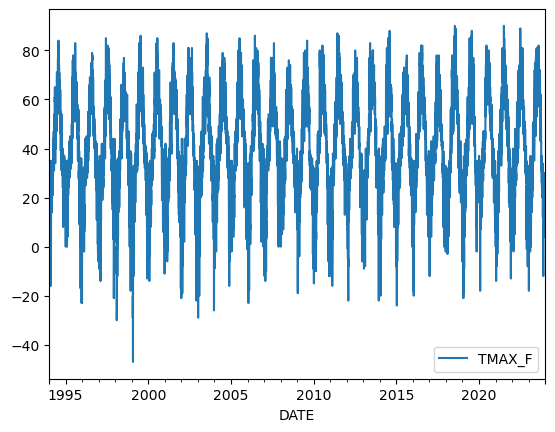

In [88]:
sample = data.loc["1994":"2023"].copy()
sample.plot(y="TMAX_F");

_**Figure 3.5**. Temperature values in Fahrenheit for 1994-2023._

In this plot, time is on the x-axis and temperatures in Fahrenheit are on the y-axis. We can clearly see how the temperatures fluctuate throughout the year. Let's investigate our data a bit further and take a look of the first rows of our sample.

In [90]:
sample.head()

,STATION_ID,TMAX_F,TMIN_F
DATE,,,
1994-01-01,GHCND:FI000007501,22.0,13.0
1994-01-02,GHCND:FI000007501,19.0,-10.0
1994-01-03,GHCND:FI000007501,19.0,-9.0
1994-01-04,GHCND:FI000007501,18.0,2.0
1994-01-05,GHCND:FI000007501,20.0,10.0


As we would expect, the first rows in our sample contain daily observations. Let's see how we can apply rolling statistics with our time series and calculate a moving average based on four closest (consecutive) temperature observations. To do this, we can use the `.rolling()` method, which takes an integer number as an argument by default to specify how many observations should be grouped together (i.e., the window size). By chaining the `.mean()` command after `.rolling()`, we can specify that we want to calculate the average temperature based on those four observations.

In [91]:
moving_temps = sample["TMAX_F"].rolling(4).mean()
moving_temps

DATE
1994-01-01      NaN
1994-01-02      NaN
1994-01-03      NaN
1994-01-04    19.50
1994-01-05    19.00
              ...  
2023-12-27    26.50
2023-12-28    21.25
2023-12-29    16.75
2023-12-30    11.75
2023-12-31     8.75
Name: TMAX_F, Length: 10957, dtype: float64

As output here, we get a `Series` in which time is the index and the newly calculated moving-window average temperatures are the values. As can be seen in this example, the first three temperature values are `NaN`, which is expected because we specified that the average should always be based on four consecutive observations. Thus, the average cannot be calculated for the first three observations, and `pandas` returns `NaN`.

In addition, it is important to note that `.rolling()` and `.resample()` work similarly, but also have differences. The main difference is that the `.rolling()` will maintain the number of observations in the data (but change the values according neighboring values, for example based on the mean), whereas `.resample()` will actually aggregate and reduce the number of observations that will be stored in the result. 

With our data set, we are fortunate that we are working with observations at regular intervals (daily), but this is not always the case. In situations where the observations are made at irregular time intervals (e.g., several times per day at irregular intervals) using a moving window with a set number of observations can result in unwanted consequences and errors in the analysis. This issue can be handled by passing a `DateOffset` as an argument in the `.rolling()` function, similar to how we did earlier when resampling our data. If the observations occur more frequently than daily, you might use a fixed window size of one day by passing `"1D"` to the function. This will keep the time span equal, no matter how many observations there would be recorded within a single day. Note, however, that the time interval being used should be equal, so values such as `"1MS"` for monthly intervals would not be consistent since the number of days in a month varies.

In our case, we can use this approach to easily calculate rolling statistics with different window sizes, such as weekly, monthly or even annual averages. We can do this by specifying a varying number of days for the moving window. To demonstrate the influence of "smoothing" our time series based on different moving window sizes, let's calculate the moving average of temperatures based on window sizes of 180 days and 360 days (roughly one year), and plot the results (details about plotting are discussed in Chapter 4).

In [106]:
half_year = sample["TMAX_F"].rolling("180D").mean()
annual = sample["TMAX_F"].rolling("360D").mean()

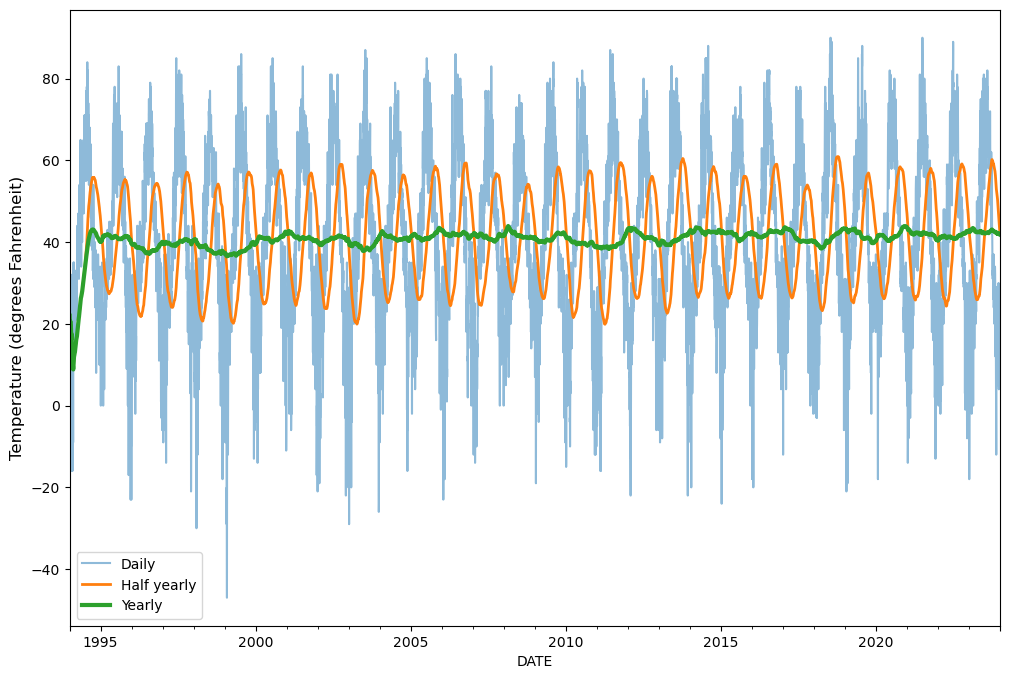

In [110]:
# Plot
ax = sample.plot(y="TMAX_F", figsize=(12, 8), alpha=0.5, label="Daily")
ax = half_year.plot(ax=ax, y="TMAX_F", lw=2, label="Half yearly")
ax = annual.plot(ax=ax, y="TMAX_F", lw=3, label="Yearly")
ax.set_ylabel("Temperature (degrees Fahrenheit)", size=12)
ax.legend();

_**Figure 3.6**. Temperature values and moving averages for 1994-2023._

As a result, we have three different lines showing how the raw daily temperature observations (`sample`, blue line) compare to those smoothed for roughly half a year (`half_year`, orange line) or one year (`annual`, green line). The daily values show how much temperature varies day to day in our data set, while yearly values roughly show how much temperatures vary from year to year. As we can observe, the variance between observations is reduced (i.e., smoothed) when the size of the window is larger. 

In quite a similar manner, it is possible to use exponentially weighted (EW) window functions to give more weight to more recent observations using a decay function, such as center of mass (com) weighting $\alpha = 1 / (1 + \mathrm{com})$. The `pandas` method `.ewm()` does this, and as a result the smoothing adapts faster to more recent changes than using equally weighted observations. The higher value you pass for the `com` parameter, the more the end result will be smoothed.

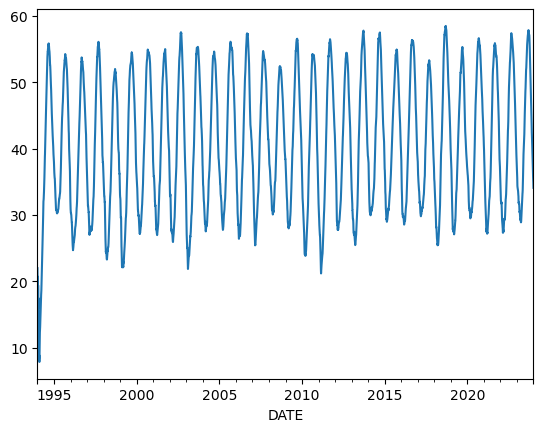

In [134]:
#sample["TMAX_F"].plot(alpha=0.5)
sample["TMAX_F"].ewm(com=90).mean().plot();

_**Figure 3.7**. Exponentially weighted temperature values for 1994-2023._

In addition to these moving window functions, `pandas` provides a method called `.expanding()`, which increases the size of the window for each observation until it encompasses the whole series. This method basically accumulates the information on each observation, similar to cumulative summing, and can be useful in some predictive applications where cumulative information about the given phenomena can provide more accurate results using more observations, for example. It is also possible to apply and chain your own functions with `.rolling()` and `.expanding()`, such as `.rolling(20).apply(myOwnFunction)`.

## Footnotes

[^isostandard]: <https://en.wikipedia.org/wiki/ISO_8601>
[^dateoffsets]: <https://pandas.pydata.org/docs/user_guide/timeseries.html#dateoffset-objects>
[^interpolation]: <https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.interpolate.html>